![Image by <a href="https://pixabay.com/users/u_f8awlsnb-12642510/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=5160616">u_f8awlsnb</a> from <a href="https://pixabay.com/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=5160616">Pixabay</a>](images/row-of-houses.jpg)

# King County Housing Model

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

![Editorial cartoon by David Horsey from Seattle Times](images/Dog-House.jpg)


## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

Questions to consider:

- Who are your stakeholders?
- What are your stakeholders' pain points related to this project?
- Why are your predictions important from a business perspective?

## Data Understanding

Describe the data being used for this project.

Questions to consider:

- Where did the data come from, and how do they relate to the data analysis questions?
- What do the data represent? Who is in the sample and what variables are included?
- What is the target variable?
- What are the properties of the variables you intend to use?

The data for this project represent home sales in King County, Washington in 2014 & 2015. The dataset includes basic house information such as the number of bedrooms & bathrooms, total area of the living space (divided into basement and above ground) & the lot, and year it was built, sales information like price & number of times it was viewed, and neighborhood information, like zipcode and information about the house and lot size of the 15 nearest neighbors.

The target variable will be the sales price.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utils as ut

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.preprocessing import RobustScaler

from yellowbrick.regressor import ResidualsPlot

import statsmodels.api as sm

pd.set_option('display.float_format', lambda x: '%.2f'%x)
%matplotlib inline

In [2]:
data = pd.read_csv('data/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,nan,0.00,...,7,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,0.00,0.00,...,7,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,0.00,0.00,...,6,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,0.00,0.00,...,7,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,0.00,0.00,...,8,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


In [3]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,19221.00,21534.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4580474287.77,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,0.23,3.41,7.66,1788.60,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2876735715.75,367368.14,0.93,0.77,918.11,41412.64,0.54,0.09,0.77,0.65,1.17,827.76,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,1000102.00,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049175.00,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900490.00,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,4.00,8.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


## Data Preparation

Describe and justify the process for preparing the data for analysis.

Questions to consider:

- Were there variables you dropped or created?
- How did you address missing values or outliers?
- Why are these choices appropriate given the data and the business problem?

'sqft_basement' is currently an object category that is mostly numbers, but some '?'. To look at this feature, I first change the ?'s to null values, then change the datatype to float. 

In [5]:
data.loc[data['sqft_basement'] == '?', 'sqft_basement'] = np.nan
data.sqft_basement = data.sqft_basement.astype(float)
# to figure out what the null values should actually be, look at how many null values and how many rows
#have the total living space (sqft_living) equal to the sum of the basement(sqft_basement) and 
#above ground (sqft_above) living space.
print(data['sqft_basement'].isna().sum())
print((data['sqft_living'] == data['sqft_basement'] + data['sqft_above']).sum())

454
21143


The sum of NaNs (454) and those that sqft_living = sqft_basement + sqft_above (21143) equals 21597- the total number of rows. This indicates that the NaNs are probably not zeros, so I replace null sqft_basement values with the total sqft_living minus sqft_above. Then confirm that the sqft_living is equal to sqft_basement plus sqft_above for all rows.

In [6]:
data['sqft_basement'] = data['sqft_basement'].fillna(data['sqft_living'] - data['sqft_above'])
(data['sqft_living'] == data['sqft_basement'] + data['sqft_above']).sum()

21597

In [7]:
#'Waterfront' is a categorical column, so change '0' to 'No', '1' to 'Yes', and 'nan' to 'unknown'
data['waterfront'] = data.loc[data['waterfront']==0, 'waterfront']= 'No'
data['waterfront'] = data.loc[data['waterfront']==1, 'waterfront']= 'Yes'
data['waterfront'] = data['waterfront'].fillna('Unknown')

In [8]:
#yr_renovated has a high number of '0's, which seems like the same as a nan, so change '0' to nan
data.loc[data['yr_renovated']== 0.0, 'yr_renovated'] = np.nan
#now only 744 rows with yr_renovated values, add new column as categorical; 
#recently renovated(last 10 years) (RR), renovated (R), not renovated (NR)
data['renovated'] = np.where(data['yr_renovated']=='NaN', 'NR',
                             np.where(data['yr_renovated']<2005, 'R', 'RR'))

/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null object
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     744 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
renovated        21597 non-null object
dtypes: float64(8), int64(11), object(

In [10]:
#look for multicolinearity in numberical features
numerical = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
              'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 
              'lat', 'long', 'zipcode', 'sqft_living15', 'sqft_lot15']

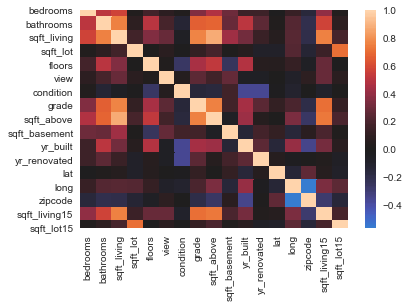

In [11]:
data_num = data[numerical]
sns.heatmap(data_num.corr(), center=0);

In [12]:
#create a df that will list the highly correlated features                            
df=data_num.corr().abs().stack().reset_index()
df.columns = ['feature1', 'feature2', 'corr']
df[(df['corr']>.75) & (df['corr'] <1)]

,feature1,feature2,corr
19,bathrooms,sqft_living,0.76
35,sqft_living,bathrooms,0.76
41,sqft_living,grade,0.76
42,sqft_living,sqft_above,0.88
49,sqft_living,sqft_living15,0.76
121,grade,sqft_living,0.76
127,grade,sqft_above,0.76
138,sqft_above,sqft_living,0.88
143,sqft_above,grade,0.76
257,sqft_living15,sqft_living,0.76


sqft_living and grade highly correlate with other features. They both have other similar features, sqft_above & sqft_basement for sqft_living, and condition for grade. So they will not be used.

In [13]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,Yes,0.00,...,1180,0.00,1955,nan,98178,47.51,-122.26,1340,5650,RR
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,Yes,0.00,...,2170,400.00,1951,1991.00,98125,47.72,-122.32,1690,7639,R
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,Yes,0.00,...,770,0.00,1933,nan,98028,47.74,-122.23,2720,8062,RR
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,Yes,0.00,...,1050,910.00,1965,nan,98136,47.52,-122.39,1360,5000,RR
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,Yes,0.00,...,1680,0.00,1987,nan,98074,47.62,-122.05,1800,7503,RR


### First Model

Will do a first model with the data as it has been processed so far. For this model, I will not use 'grade' & 'sqft_living' due to their colinearity with multiple other features, 'yr_renovated' has been transformed into the categorical 'renovated' feature and 'id' isn't a feature that would be related to the home's price. I may come back to the 'date', 'lat', & 'long' features in a later model, as they could be related to price and are somewhat under the control of a home buyer. 

At this point, you can also consider what a baseline, model-less prediction might look like, and begin evaluating this model compared to that baseline.

In [51]:
#divide data into continuous and categorical features. 
categoricals = ['waterfront', 'renovated', 'zipcode']
continuous = ['sqft_lot', 'sqft_lot15', 'sqft_living15', 'yr_built', 'condition',
              'bedrooms', 'bathrooms', 'sqft_above', 'sqft_basement', 'floors', 'price']
cat_data = data[categoricals]
cont_data = data[continuous]              

In [52]:
X, y = ut.ohe_concat(cat_data, cont_data, categoricals, 'price')

In [53]:
X.head()

,waterfront_Yes,renovated_R,renovated_RR,sqft_lot,sqft_lot15,sqft_living15,yr_built,condition,bedrooms,bathrooms,sqft_above,sqft_basement,floors
0,1,0,1,5650,5650,1340,1955,3,3,1.00,1180,0.00,1.00
1,1,1,0,7242,7639,1690,1951,3,3,2.25,2170,400.00,2.00
2,1,0,1,10000,8062,2720,1933,3,2,1.00,770,0.00,1.00
3,1,0,1,5000,5000,1360,1965,5,4,3.00,1050,910.00,1.00
4,1,0,1,8080,7503,1800,1987,3,3,2.00,1680,0.00,1.00


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=9)

In [55]:
#instanciate LinearRegression
linreg = LinearRegression()
#fit model
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
ut.predictions(linreg, X_train, X_test, y_train, y_test)

Training Scores: R2 0.56896, Mean Absolute Error 155976.26, Root Mean Squared Error 239331.20
Testing Scores: R2 0.57419, Mean Absolute Error 158267.33, Root Mean Squared Error 246768.07


In [57]:
ut.ols_summary(X_train, y_train, X)

/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     2072.
Date:                Tue, 26 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:02:54   Log-Likelihood:            -2.3850e+05
No. Observations:               17277   AIC:                         4.770e+05
Df Residuals:                   17265   BIC:                         4.771e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
waterfront_Yes  4.338e+06   1.09e+05     39.628      0.000    4.12e+06    4.55e+06
renovated_R     2.188e+06   5.38e+04     40.666      0.000    2.08e+06    2.29e+06
renovated_RR     2.15e+06   5.64e+04     38.123      0.000    2.04e+06    2.26e+06
sqft_lot          -0.0224      0.069     -0.326      0.745      -0.157       0.112
sqft_lot15        -0.7598      0.106     -7.197      0.000      -0.967      -0.553
sqft_living15     91.3435      4.268     21.402      0.000      82.978      99.709
yr_built       -3401.6220     84.178    -40.410      0.000   -3566.619   -3236.625
condition       1.903e+04   3075.530      6.188      0.000     1.3e+04    2.51e+04
bedrooms       -7.158e+04   2583.677    -27.706      0.000   -7.66e+04   -6.65e+04
bathrooms       7.039e+04   4300.763     16.367      0.000     6.2e+04    7.88e+04
sqft_above       249.1956      4.503     55.344      0.000     240.370     258.021
sqft_basement    251.3240      5.567     45.142      0.000     240.411     262.237
floors          6.033e+04   4639.722     13.004      0.000    5.12e+04    6.94e+04
==============================================================================
Omnibus:                    12953.149   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           717777.533
Skew:                           3.086   Prob(JB):                         0.00
Kurtosis:                      33.968   Cond. No.                     5.98e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.1e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

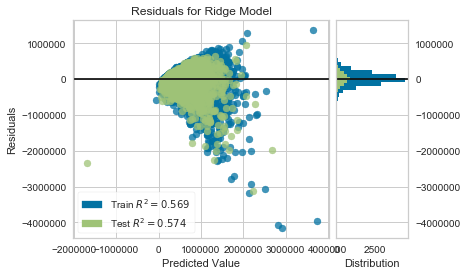

In [58]:
# Instantiate the linear model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()  

### Model #2

Try again, normalize and scale data. Using the same features as the first model, so starting with the cont_data and cat_data dataframes.

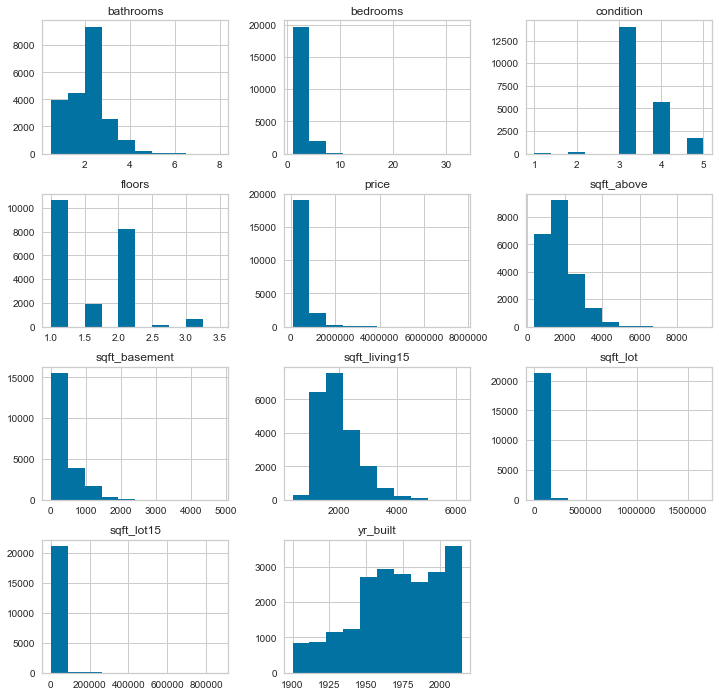

In [22]:
#look at histograms of the continuous data previously identified
cont_data.hist(figsize= (12, 12))
plt.show()

None of these are normally distributed.

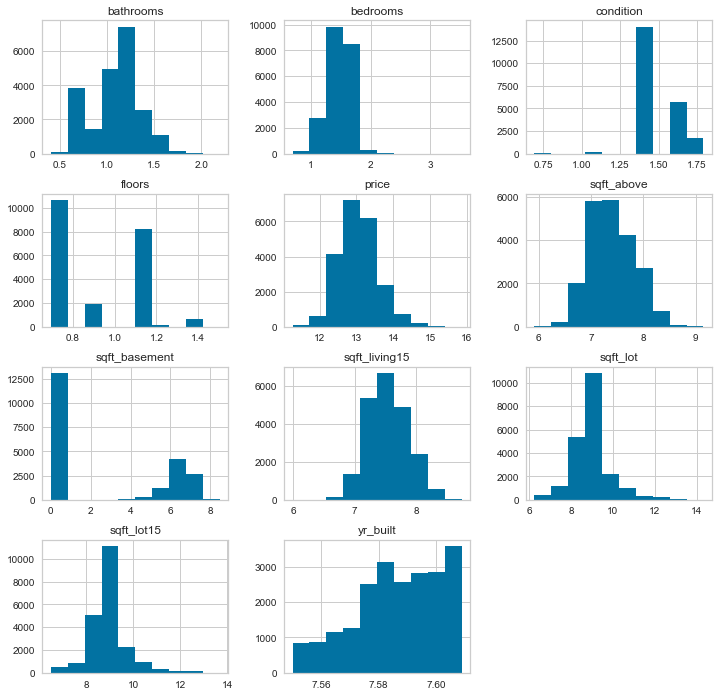

In [23]:
# take log of continuous data and plot histograms
cont_data_log = np.log1p(cont_data)
cont_data_log.hist(figsize= (12, 12))
plt.show()

With the exception of yr_built, the features look more normally distributed. 

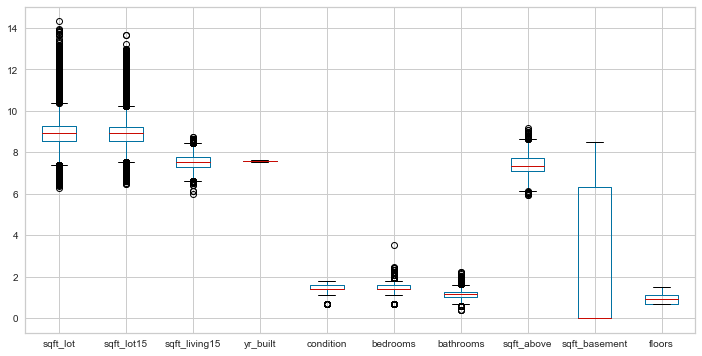

In [24]:
#check continuous features for outliers. Excluded price as it is the target feature 
#and also on a scale much larger than the others
cont_data_log.drop(['price'], axis=1).boxplot(figsize= (12, 6))

6 of the 10 features have a large number of outliers. Additionally, they are fairly normally distributed. Thus, I use the RobustScaler to scale the explanatory features. First, I one hot encode the categorical data, concatenate the continuous and categorical data and split the resulting dataframes into train and test sets.

In [25]:
#one hot encode the categoricals, concatenate the ohe categoricals with the log of continuous data
#then split into the target and explanatory features. 
X2, y2 = ut.ohe_concat(cat_data, cont_data_log, categoricals, 'price')
#split X2 and y2 into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state=9)

In [26]:
#use RobustScaler to scale data and deal with outliers
scaler = RobustScaler()
X_train2_scaled = pd.DataFrame(scaler.fit_transform(X_train2))
X_test2_scaled = pd.DataFrame(scaler.fit_transform(X_test2))

Now that the data has been transformed and scaled, I make a second model.

In [27]:
linreg2 = LinearRegression()
linreg2.fit(X_train2_scaled, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
ut.predictions(linreg2, X_train2_scaled, X_test2_scaled, y_train2, y_test2)

Training Scores: R2 0.85060, Mean Absolute Error 0.15, Root Mean Squared Error 0.20
Testing Scores: R2 0.84489, Mean Absolute Error 0.15, Root Mean Squared Error 0.21


In [29]:
ut.ols_summary(X_train2, y_train2, X2)

/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     1224.
Date:                Tue, 26 Jan 2021   Prob (F-statistic):               0.00
Time:                        20:54:17   Log-Likelihood:                 3020.1
No. Observations:               17277   AIC:                            -5878.
Df Residuals:                   17196   BIC:                            -5250.
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
waterfront_Yes     1.0433      0.865      1.207      0.228      -0.651       2.738
renovated_R        0.5542      0.431      1.286      0.198      -0.291       1.399
renovated_RR       0.4891      0.434      1.128      0.259      -0.361       1.339
zipcode_98001     -0.5094      0.018    -28.033      0.000      -0.545      -0.474
zipcode_98002     -0.5102      0.021    -24.722      0.000      -0.551      -0.470
zipcode_98003     -0.4672      0.019    -25.092      0.000      -0.504      -0.431
zipcode_98004      0.6655      0.018     36.521      0.000       0.630       0.701
zipcode_98005      0.2297      0.022     10.415      0.000       0.186       0.273
zipcode_98006      0.2127      0.017     12.596      0.000       0.180       0.246
zipcode_98007      0.1677      0.023      7.288      0.000       0.123       0.213
zipcode_98008      0.2060      0.019     11.109      0.000       0.170       0.242
zipcode_98010     -0.3120      0.027    -11.726      0.000      -0.364      -0.260
zipcode_98011     -0.0690      0.020     -3.369      0.001      -0.109      -0.029
zipcode_98014     -0.2403      0.025     -9.668      0.000      -0.289      -0.192
zipcode_98019     -0.2234      0.022    -10.291      0.000      -0.266      -0.181
zipcode_98022     -0.4545      0.021    -22.153      0.000      -0.495      -0.414
zipcode_98023     -0.5148      0.017    -30.733      0.000      -0.548      -0.482
zipcode_98024     -0.0997      0.028     -3.551      0.000      -0.155      -0.045
zipcode_98027      0.0120      0.017      0.687      0.492      -0.022       0.046
zipcode_98028     -0.0810      0.019     -4.327      0.000      -0.118      -0.044
zipcode_98029      0.1336      0.019      7.218      0.000       0.097       0.170
zipcode_98030     -0.4742      0.020    -24.073      0.000      -0.513      -0.436
zipcode_98031     -0.4422      0.019    -22.908      0.000      -0.480      -0.404
zipcode_98032     -0.4930      0.024    -20.957      0.000      -0.539      -0.447
zipcode_98033      0.3241      0.017     19.123      0.000       0.291       0.357
zipcode_98034      0.0687      0.016      4.237      0.000       0.037       0.100
zipcode_98038     -0.3650      0.017    -21.779      0.000      -0.398      -0.332
zipcode_98039      0.8810      0.034     26.182      0.000       0.815       0.947
zipcode_98040      0.4565      0.019     24.136      0.000       0.419       0.494
zipcode_98042     -0.4517      0.017    -26.781      0.000      -0.485      -0.419
zipcode_98045     -0.1782      0.021     -8.586      0.000      -0.219      -0.137
zipcode_98052      0.1458      0.016      8.908      0.000       0.114       0.178
zipcode_98053      0.0665      0.018      3.634      0.000       0.031       0.102
zipcode_98055     -0.3619      0.019    -19.383      0.000      -0.399      -0.325
zipcode_9805

In [30]:
coef_dict2 = dict(zip(X2.columns, linreg2.coef_))

In [31]:
sorted(coef_dict2.items(), key=lambda x: x[1], reverse=True)

[('renovated_R', 65007097507.7532),
 ('renovated_RR', 65007097507.688126),
 ('zipcode_98039', 422222236.4924747),
 ('zipcode_98004', 422222236.276852),
 ('zipcode_98112', 422222236.2571156),
 ('zipcode_98119', 422222236.2355836),
 ('zipcode_98109', 422222236.22602886),
 ('zipcode_98102', 422222236.1768457),
 ('zipcode_98105', 422222236.14459765),
 ('zipcode_98199', 422222236.07719636),
 ('zipcode_98107', 422222236.0765929),
 ('zipcode_98040', 422222236.0679319),
 ('zipcode_98103', 422222236.0538795),
 ('zipcode_98122', 422222236.04515904),
 ('zipcode_98117', 422222236.0373522),
 ('zipcode_98115', 422222236.0119981),
 ('zipcode_98116', 422222236.011344),
 ('zipcode_98033', 422222235.93557537),
 ('zipcode_98136', 422222235.927454),
 ('zipcode_98144', 422222235.9099758),
 ('zipcode_98005', 422222235.8410809),
 ('zipcode_98006', 422222235.82418966),
 ('zipcode_98008', 422222235.8174805),
 ('zipcode_98126', 422222235.7906594),
 ('zipcode_98177', 422222235.7868216),
 ('zipcode_98007', 422222

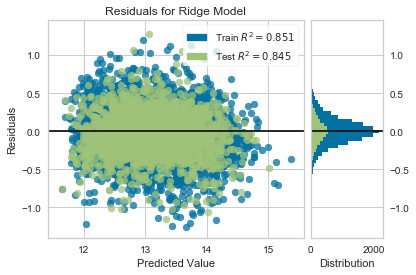

In [32]:
# Instantiate the linear model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train2_scaled, y_train2)  # Fit the training data to the visualizer
visualizer.score(X_test2_scaled, y_test2)  # Evaluate the model on the test data
visualizer.show()

### Model #3

There are a lot of zipcodes, so I will see if I can cut down the number of categories that need to be one hot encoded by looking for a proxy measure of zipcode. The main thing about zipcodes as related to housing prices, I think, is the median income of the zipcode, so I will split into categories by income. I found median income by zipcode data from https://www.communitiescount.org/population-dashboard. Income category cut off numbers also come from the map on that site.

In [33]:
#import dataset of King county zipcode and avg incomes
data_zip = pd.read_csv('data/zipcode-income.csv')
data_zip.head()

,Category (Category),Zipcode,Min. LB,Min. UB,Income
0,Income,98354,67638.16,84901.84,76270.00
1,Income,98288,30357.80,54642.20,42500.00
2,Income,98224,19460.68,63039.32,41250.00
3,Income,98199,101181.84,115474.16,108328.00
4,Income,98198,60796.76,65771.24,63284.00


In [34]:
# create new column "income" that categorizes income into low (less than $79,000) '1', middle ($79,000-$120,000) '2'
# high ($120,000-$140,000) '3' and very_high (more than $140,000) '4' based on the map associated with the dataset. 
# I chose to use numbers so that the category could be either continuous or categorical.
data_zip['income'] = np.where(data_zip['Income']<79000, 1, 
                          np.where((data_zip['Income']>=79000) & (data_zip['Income']<120000), 2, 
                                  np.where(data_zip['Income'] >= 140000, 4, 3)))
                                 
data_zip.head()

,Category (Category),Zipcode,Min. LB,Min. UB,Income,income
0,Income,98354,67638.16,84901.84,76270.00,1
1,Income,98288,30357.80,54642.20,42500.00,1
2,Income,98224,19460.68,63039.32,41250.00,1
3,Income,98199,101181.84,115474.16,108328.00,2
4,Income,98198,60796.76,65771.24,63284.00,1


In [35]:
#add the both income features to the main dataset by maping zipcode to a dictionary of 
#zipcodes and median incomes/income levels
zip_income_cat = dict(zip(data_zip['Zipcode'],data_zip['income']))
data['income_cat'] = data['zipcode'].map(zip_income_cat)

zip_income = dict(zip(data_zip['Zipcode'],data_zip['Income']))
data['income'] = data['zipcode'].map(zip_income)

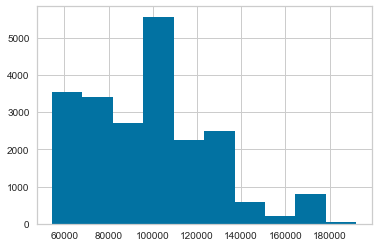

In [36]:
data['income'].hist()

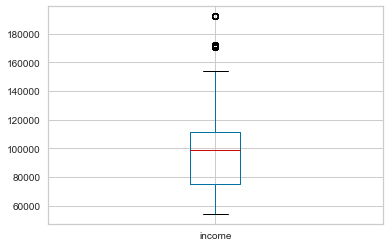

In [37]:
data.boxplot(column='income')

In [38]:
# run the model using the income column instead of zipcode
categoricals3 = ['waterfront', 'renovated',]
continuous3 = ['income', 'sqft_lot',  'sqft_lot15', 'sqft_living15', 'sqft_above', 'sqft_basement',
              'yr_built', 'condition', 'price', 'bedrooms', 'floors', 'bathrooms']
cat_data3 = data[categoricals3]
cont_data3 = data[continuous3]     

cont_data_log3 = np.log1p(cont_data3)

X3, y3 = ut.ohe_concat(cat_data3, cont_data_log3, categoricals3, 'price')

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.2, random_state=94)

scaler = RobustScaler()
X_train3_scaled = pd.DataFrame(scaler.fit_transform(X_train3))
X_test3_scaled = pd.DataFrame(scaler.fit_transform(X_test3))

#instanciate LinearRegression
linreg3 = LinearRegression()
#fit model
linreg3.fit(X_train3_scaled, y_train3)

#make predictions
ut.predictions(linreg3, X_train3_scaled, X_test3_scaled, y_train3, y_test3)

Training Scores: R2 0.65898, Mean Absolute Error 0.24, Root Mean Squared Error 0.31
Testing Scores: R2 0.64296, Mean Absolute Error 0.24, Root Mean Squared Error 0.31


#### Results without either zip or income:
Training Scores: R2 0.57569, Mean Absolute Error 0.27, Root Mean Squared Error 0.34  
Testing Scores: R2 0.55569, Mean Absolute Error 0.27, Root Mean Squared Error 0.34
#### Results with median income: 
Training Scores: R2 0.65898, Mean Absolute Error 0.24, Root Mean Squared Error 0.31  
Testing Scores: R2 0.64296, Mean Absolute Error 0.24, Root Mean Squared Error 0.31
#### Results with income as category:
Training Scores: R2 0.65272, Mean Absolute Error 0.24, Root Mean Squared Error 0.31  
Testing Scores: R2 0.63426, Mean Absolute Error 0.25, Root Mean Squared Error 0.31
#### Results with zipcode:
Training Scores: R2 0.85147, Mean Absolute Error 0.15, Root Mean Squared Error 0.20  
Testing Scores: R2 0.84100, Mean Absolute Error 0.15, Root Mean Squared Error 0.21
#### Results with zipcode and median income:
Training Scores: R2 0.85148, Mean Absolute Error 0.15, Root Mean Squared Error 0.20  
Testing Scores: R2 0.84105, Mean Absolute Error 0.15, Root Mean Squared Error 0.21

Adding the zipcode to the model improves the R2 value by 0.27, while adding the median income to the model improves the R2 by 0.08 and the income categories improve it by 0.07. Thus, while the income is an important aspect of the influence that zipcode has on house prices, it only explains around 25% of the zipcode effect. 

## Model 4

In [47]:
categoricals4 = ['waterfront', 'renovated']
continuous4 = ['income', 'sqft_lot',  'sqft_lot15', 'sqft_living15', 'sqft_above', 'sqft_basement',
              'yr_built', 'condition', 'price', 'bedrooms', 'floors', 'bathrooms']
cat_data4 = data[categoricals4]
cont_data4 = data[continuous4]     

cont_data_log4 = np.log1p(cont_data4)

X4, y4 = ut.ohe_concat(cat_data4, cont_data_log4, categoricals4, 'price')

# X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size = 0.2, random_state=3)

# scaler = RobustScaler()
# X_train4_scaled = pd.DataFrame(scaler.fit_transform(X_train4))
# X_test4_scaled = pd.DataFrame(scaler.fit_transform(X_test4))

# #instanciate LinearRegression
# linreg4 = LinearRegression()
# #fit model
# linreg4.fit(X_train3_scaled, y_train3)

# #make predictions
# ut.predictions(linreg4, X_train4_scaled, X_test4_scaled, y_train4, y_test4)

In [48]:
y_data = y4
X_data = X4
y_dataset = y_data.values
X_dataset = X_data.values

linreg4 = LinearRegression()
# create the RFE model 
# and select attributes
rfe = RFE(linreg4, 1)
rfe = rfe.fit(X_dataset.data, y_dataset)
# print summaries for the selection of attributes
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False  True False False
 False False]
[14 12 13  3 11  8  4  5 10  1  7  6  9  2]


In [49]:
rfe_rank = dict(zip(X4.columns, rfe.ranking_))

In [50]:
sorted(rfe_rank.items(), key=lambda x: x[1])


[('yr_built', 1),
 ('bathrooms', 2),
 ('income', 3),
 ('sqft_living15', 4),
 ('sqft_above', 5),
 ('bedrooms', 6),
 ('condition', 7),
 ('sqft_lot15', 8),
 ('floors', 9),
 ('sqft_basement', 10),
 ('sqft_lot', 11),
 ('renovated_R', 12),
 ('renovated_RR', 13),
 ('waterfront_Yes', 14)]

## Model 5

In [64]:
categoricals5 = ['waterfront', 'renovated']
continuous5 = ['income', 'sqft_lot',  'sqft_lot15', 'sqft_living15', 'sqft_above', 'sqft_basement',
              'yr_built', 'condition', 'price', 'bedrooms', 'floors', 'bathrooms']
cat_data5 = data[categoricals5]
cont_data5 = data[continuous5]     

cont_log5 = np.log1p(cont_data5)

X5, y5 = ut.ohe_concat(cat_data5, cont_log5, categoricals5, 'price')

y_exp5 = np.expm1(y5)


X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y_exp5, test_size = 0.2, random_state=4)

scaler = RobustScaler()
X_train5_scaled = pd.DataFrame(scaler.fit_transform(X_train5))
X_test5_scaled = pd.DataFrame(scaler.fit_transform(X_test5))

#instanciate LinearRegression
linreg5 = LinearRegression()
#fit model
linreg5.fit(X_train5_scaled, y_train5)



#make predictions
ut.predictions(linreg5, X_train5_scaled, X_test5_scaled, y_train5, y_test5)

Training Scores: R2 0.51420, Mean Absolute Error 157105.85, Root Mean Squared Error 253448.78
Testing Scores: R2 0.51566, Mean Absolute Error 159486.14, Root Mean Squared Error 265732.43


In [65]:
coef_dict5 = dict(zip(X5.columns, linreg5.coef_))
sorted(coef_dict5.items(), key=lambda x: x[1], reverse=True)

[('sqft_above', 277668.5504316084),
 ('sqft_basement', 185867.86715991818),
 ('income', 106729.1362415707),
 ('sqft_living15', 80064.8536187987),
 ('bathrooms', 45962.94434809691),
 ('renovated_R', 26524.815826563696),
 ('floors', 26110.18561213841),
 ('condition', 16474.2010543727),
 ('waterfront_Yes', 0.0),
 ('sqft_lot', -8140.354792497105),
 ('sqft_lot15', -14574.371643144446),
 ('renovated_RR', -26524.815826563696),
 ('bedrooms', -58142.51321243638),
 ('yr_built', -164403.16643626557)]

## Modeling

Describe and justify the process for analyzing or modeling the data.

Questions to consider:

- How did you analyze or model the data?
- How did you iterate on your initial approach to make it better?
- Why are these choices appropriate given the data and the business problem?

In [45]:
# code here to do your second, more refined model

In [46]:
# code here to iteratively improve your models

## Evaluation

Evaluate how well your work solves the stated business problem.

Questions to consider:

- How do you interpret the results?
- How well does your model fit your data? How much better is this than your baseline model?
- How well does your model/data fit any modeling assumptions?
- How confident are you that your results would generalize beyond the data you have?
- How confident are you that this model would benefit the business if put into use?

Please note - you should be evaluating each model as you move through, and be sure to evaluate your models consistently.

## Conclusions

Provide your conclusions about the work you've done, including any limitations or next steps.

Questions to consider:

- What would you recommend the business do as a result of this work?
- What are some reasons why your analysis might not fully solve the business problem?
- What else could you do in the future to improve this project (future work)?
